# Mohammad Reza Alikhani's thesis

# Import packages and data

## Import packages

In [3]:
import pandas as pd
import numpy as np
import dtale
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
# import pywt   this is for wavelet
import sktime

print(f"Import done Baby.")

Import done Baby.


## Import data

In [4]:
df = pd.read_excel("Data.xlsx")

In [5]:
df.head()

,Station,Date,Max temp,Min temp,Mean temp,24h precipitation,Max releative humidity (%),Min releative humidity (%),Mean releative humidity (%),Evap,Produced water
0,Najafabad,2015-03-21,20.8,4.4,14.6,2.0,89,24.0,49.6,NaN,43268
1,Najafabad,2015-03-22,18.4,9.2,14.1,0.4,83,34.0,57.8,4.0,27576
2,Najafabad,2015-03-23,13.2,7.0,10.3,14.0,35,21.0,25.4,1.7,33149
3,Najafabad,2015-03-24,15.2,0.0,9.4,0.0,75,23.0,39.0,7.9,36637
4,Najafabad,2015-03-25,17.0,3.0,11.3,0.0,61,26.0,42.6,NaN,36083


<div dir='rtl'>
تغییر فرمت ستون تاریخ از عدد به تاریخ

In [6]:
pd.to_datetime(df['Date'])

0      2015-03-21
1      2015-03-22
2      2015-03-23
3      2015-03-24
4      2015-03-25
          ...    
1821   2020-03-15
1822   2020-03-16
1823   2020-03-17
1824   2020-03-18
1825   2020-03-19
Name: Date, Length: 1826, dtype: datetime64[ns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Station                      1826 non-null   object        
 1   Date                         1826 non-null   datetime64[ns]
 2   Max temp                     1823 non-null   float64       
 3   Min temp                     1792 non-null   float64       
 4   Mean temp                    1826 non-null   float64       
 5   24h precipitation            1826 non-null   float64       
 6   Max releative humidity (%)   1826 non-null   int64         
 7   Min releative humidity (%)   1822 non-null   float64       
 8   Mean releative humidity (%)  1826 non-null   float64       
 9   Evap                         1311 non-null   float64       
 10  Produced water               1826 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(2),

<div dir='rtl'>
بررسی آماری داده های ورودی

In [8]:
df.describe()

,Max temp,Min temp,Mean temp,24h precipitation,Max releative humidity (%),Min releative humidity (%),Mean releative humidity (%),Evap,Produced water
count,1823.000000,1792.000000,1826.000000,1826.00000,1826.000000,1822.000000,1826.000000,1311.000000,1826.000000
mean,24.339331,10.229018,18.808269,0.29201,49.248083,19.189901,30.972508,8.235393,42403.008762
std,9.731842,8.540894,9.628283,1.60597,21.774594,12.664780,16.254219,3.680769,7349.272697
min,-0.800000,-9.600000,-2.400000,0.00000,10.000000,2.000000,4.400000,0.300000,1008.000000
25%,15.800000,2.800000,10.025000,0.00000,31.000000,10.000000,17.800000,5.400000,36994.500000
50%,24.600000,10.600000,18.900000,0.00000,45.000000,15.000000,26.400000,8.600000,40795.000000
75%,33.600000,18.000000,28.175000,0.00000,66.000000,25.000000,40.800000,10.700000,47342.500000
max,41.000000,26.800000,35.200000,35.00000,97.000000,93.000000,94.000000,18.800000,65203.000000


Calculate Pearson correlation.

In [9]:
df_corr_pear = df.corr(method='pearson')[['Produced water']]
df_corr_pear

C:\Users\alikh\AppData\Local\Temp\ipykernel_4412\3023493356.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Produced water
Max temp,0.749734
Min temp,0.719693
Mean temp,0.752495
24h precipitation,-0.175903
Max releative humidity (%),-0.638073
Min releative humidity (%),-0.507704
Mean releative humidity (%),-0.609594
Evap,0.657104
Produced water,1.000000


In [10]:
df_corr_kendall = df.corr(method='kendall')[['Produced water']]
df_corr_kendall

C:\Users\alikh\AppData\Local\Temp\ipykernel_4412\21380294.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Produced water
Max temp,0.582047
Min temp,0.553577
Mean temp,0.578624
24h precipitation,-0.194581
Max releative humidity (%),-0.489089
Min releative humidity (%),-0.429727
Mean releative humidity (%),-0.496455
Evap,0.498628
Produced water,1.000000


In [11]:
df_corr_spearman = df.corr(method='spearman')[['Produced water']]
df_corr_spearman

C:\Users\alikh\AppData\Local\Temp\ipykernel_4412\4166351172.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Produced water
Max temp,0.780915
Min temp,0.749968
Mean temp,0.777330
24h precipitation,-0.243550
Max releative humidity (%),-0.686367
Min releative humidity (%),-0.606146
Mean releative humidity (%),-0.695836
Evap,0.697236
Produced water,1.000000


Create a correlation table contains all three methods

In [12]:
corr_table = pd.DataFrame(
    {
        "Pearson": df_corr_pear["Produced water"],
        "Kendall": df_corr_kendall["Produced water"],
        "Spearman": df_corr_spearman["Produced water"],
    }
)

In [13]:
corr_table

,Pearson,Kendall,Spearman
Max temp,0.749734,0.582047,0.780915
Min temp,0.719693,0.553577,0.749968
Mean temp,0.752495,0.578624,0.777330
24h precipitation,-0.175903,-0.194581,-0.243550
Max releative humidity (%),-0.638073,-0.489089,-0.686367
Min releative humidity (%),-0.507704,-0.429727,-0.606146
Mean releative humidity (%),-0.609594,-0.496455,-0.695836
Evap,0.657104,0.498628,0.697236
Produced water,1.000000,1.000000,1.000000


In [14]:
fig = px.bar(corr_table,
barmode="group",
template="simple_white")

fig.update_yaxes(dict(showgrid=True , title = "Correlation value"))

Evaporation data does not have enough correlation. They will be dropped.

`From now, main dataframe is df_2`

In [15]:
df_2 = df.drop(columns=['24h precipitation' , 'Station'])

In [16]:
df_2.head(2)

,Date,Max temp,Min temp,Mean temp,Max releative humidity (%),Min releative humidity (%),Mean releative humidity (%),Evap,Produced water
0,2015-03-21,20.8,4.4,14.6,89,24.0,49.6,NaN,43268
1,2015-03-22,18.4,9.2,14.1,83,34.0,57.8,4.0,27576


Set 'Date' column as Index

In [17]:
df_2.set_index("Date", inplace=True)

Calculate Pearson correlation again.

In [18]:
df_2.corr(method="pearson", numeric_only=True)[["Produced water"]]

,Produced water
Max temp,0.749734
Min temp,0.719693
Mean temp,0.752495
Max releative humidity (%),-0.638073
Min releative humidity (%),-0.507704
Mean releative humidity (%),-0.609594
Evap,0.657104
Produced water,1.000000


In [19]:
df_2.corr(method="spearman", numeric_only=True)[["Produced water"]]

,Produced water
Max temp,0.780915
Min temp,0.749968
Mean temp,0.777330
Max releative humidity (%),-0.686367
Min releative humidity (%),-0.606146
Mean releative humidity (%),-0.695836
Evap,0.697236
Produced water,1.000000


In [20]:
df_2.corr(method="kendall", numeric_only=True)[["Produced water"]]

,Produced water
Max temp,0.582047
Min temp,0.553577
Mean temp,0.578624
Max releative humidity (%),-0.489089
Min releative humidity (%),-0.429727
Mean releative humidity (%),-0.496455
Evap,0.498628
Produced water,1.000000


Save new dataframw which has only features with high correlation

In [23]:
# This cell should not run every time
df_2.to_excel("df_2.xlsx")

Check for NaN values

In [21]:
for col in list(df_2.columns):
    print(f"Number of missing values for column {col}: {df_2[col].isna().sum()}")

Number of missing values for column Max temp: 3
Number of missing values for column Min temp: 34
Number of missing values for column Mean temp: 0
Number of missing values for column Max releative humidity (%): 0
Number of missing values for column Min releative humidity (%): 4
Number of missing values for column Mean releative humidity (%): 0
Number of missing values for column Evap: 515
Number of missing values for column Produced water: 0


Visualize target

In [110]:
fig = px.line(data_frame=df_2,
              x=df_2.index,
              y='Produced water',
              template='simple_white',
              title="Produced water",
)

fig.update_yaxes(dict(showgrid=True))
fig.update_yaxes(dict(title='MCM'))
fig

In [133]:
fig = px.box(x=or_fil.index.month,
             y=or_fil["Original data"],
             title="Original data based on monthes",
             template="simple_white"
             )
fig.update_xaxes(dict(title="Month of the year"))
fig.update_yaxes(dict(title="Original data (MCM)"))
fig

In [142]:
fig = px.box(x=or_fil.index.month,
             y=or_fil["Filtered data"],
             title="Filtered data based on monthes",
             template="simple_white"
             )
fig.update_xaxes(dict(title="Month of the year"))
fig.update_yaxes(dict(title="Filtered data (MCM)"))
fig

In [134]:
fig = px.box(x=or_fil.index.quarter,
             y=or_fil["Original data"],
             title="Original data based on quarters",
             template="simple_white"
             )
fig.update_xaxes(dict(title="Quarter of the year"))
fig.update_yaxes(dict(title="Original data (MCM)"))
fig

In [147]:
fig = px.box(x=or_fil.index.quarter,
             y=or_fil["Filtered data"],
             title="Filtered data based on quarters",
             template="simple_white"
             )
fig.update_xaxes(dict(title="Quarter of the year"))
fig.update_yaxes(dict(title="Filtered data (MCM)"))
fig

Use `HampleFilter` for outlier detection

In [ ]:
# import HampelFilter
from sktime.transformations.series.outlier_detection import HampelFilter

In [148]:
# create an instance from class filter
transformer = HampelFilter(window_length=10,
                           n_sigma=2)

# implement filter on timeseries
y_hat = transformer.fit_transform(df_2["Produced water"])

In [149]:
# create a dataframe to compare original data vs filtered data
or_fil = pd.DataFrame({"Original data" : df_2["Produced water"],
                       "Filtered data" : y_hat})

or_fil.head(3)

,Original data,Filtered data
Date,,
2015-03-21,43268,NaN
2015-03-22,27576,NaN
2015-03-23,33149,33149.0


In [150]:
# how many records considerd as outliers
or_fil["Filtered data"].isna().sum()

194

In [151]:
fig = px.line(
    data_frame=or_fil,
    x=or_fil.index,
    y=["Original data", "Filtered data"],
    template="simple_white",
    title="Original vs. filtered data",
)
fig.update_yaxes(dict(title="Produced water (MCM)"))
fig

Now, I impute NaN values caused by removing outliers

In [155]:
# import packages
from sktime.transformations.series.impute import Imputer
from sktime.split import temporal_train_test_split

In [181]:
y = or_fil["Filtered data"]
y_train, y_test = temporal_train_test_split(y)

In [182]:
# create an instance from class imputer
transformer = Imputer(method="linear",
                      random_state=98,
                    )

#fit the imputer
y_train = transformer.fit_transform(y_train)

In [183]:
y_train

Date
2015-03-21    33149.0
2015-03-22    33149.0
2015-03-23    33149.0
2015-03-24    36637.0
2015-03-25    36083.0
               ...   
2018-12-14    36335.0
2018-12-15    30575.0
2018-12-16    31098.0
2018-12-17    31621.0
2018-12-18    32144.0
Name: Filtered data, Length: 1369, dtype: float64

In [184]:
y_hat = transformer.transform(y_test)
y_hat

Date
2018-12-19    34078.0
2018-12-20    33559.0
2018-12-21    33001.0
2018-12-22    32700.5
2018-12-23    32400.0
               ...   
2020-03-15    47640.5
2020-03-16    46620.0
2020-03-17    49147.0
2020-03-18    49705.0
2020-03-19    49705.0
Name: Filtered data, Length: 457, dtype: float64

In [185]:
new = pd.concat([y_train,y_hat], axis=0) # type: ignore

In [186]:
px.line(new)

In [188]:
# create a dataframe to compare original data vs filtered data
or_fil_new = pd.DataFrame({"Original data" : df_2["Produced water"],
                           "Filtered data with no NaN" : new})

or_fil_new.head(3)

,Original data,Filtered data with no NaN
Date,,
2015-03-21,43268,33149.0
2015-03-22,27576,33149.0
2015-03-23,33149,33149.0


In [189]:
fig = px.line(
    data_frame=or_fil_new,
    x=or_fil.index,
    y=["Original data", "Filtered data with no NaN"],
    template="simple_white",
    title="Original vs. filtered data with no NaN",
)
fig.update_yaxes(dict(title="Produced water (MCM)"))
fig

Visualize column with NaN values

In [47]:
fig = px.line(data_frame=df_2,
              y=['Max temp','Min temp'],
              template='simple_white',
              title='Max and Min temp'
              )

fig.update_legends(dict(title=None))
fig.update_yaxes(dict(title='C degree'))
fig.update_xaxes(dict(title='Year'))

In [14]:
fig = px.line(data_frame=df_2,
              y=['Min releative humidity (%)'],
              template='simple_white',
              title='Humidity values %'
              )

fig.update_legends(dict(title=None))
fig.update_yaxes(dict(title='%'))
fig.update_xaxes(dict(title='Year'))

In [15]:
fig = px.line(data_frame=df_2,
              y=['Evap'],
              template='simple_white',
              title='Evaporation values',
              )

fig.update_legends(dict(title=None))
fig.update_yaxes(dict(title='mm'))
fig.update_xaxes(dict(title='Year'))

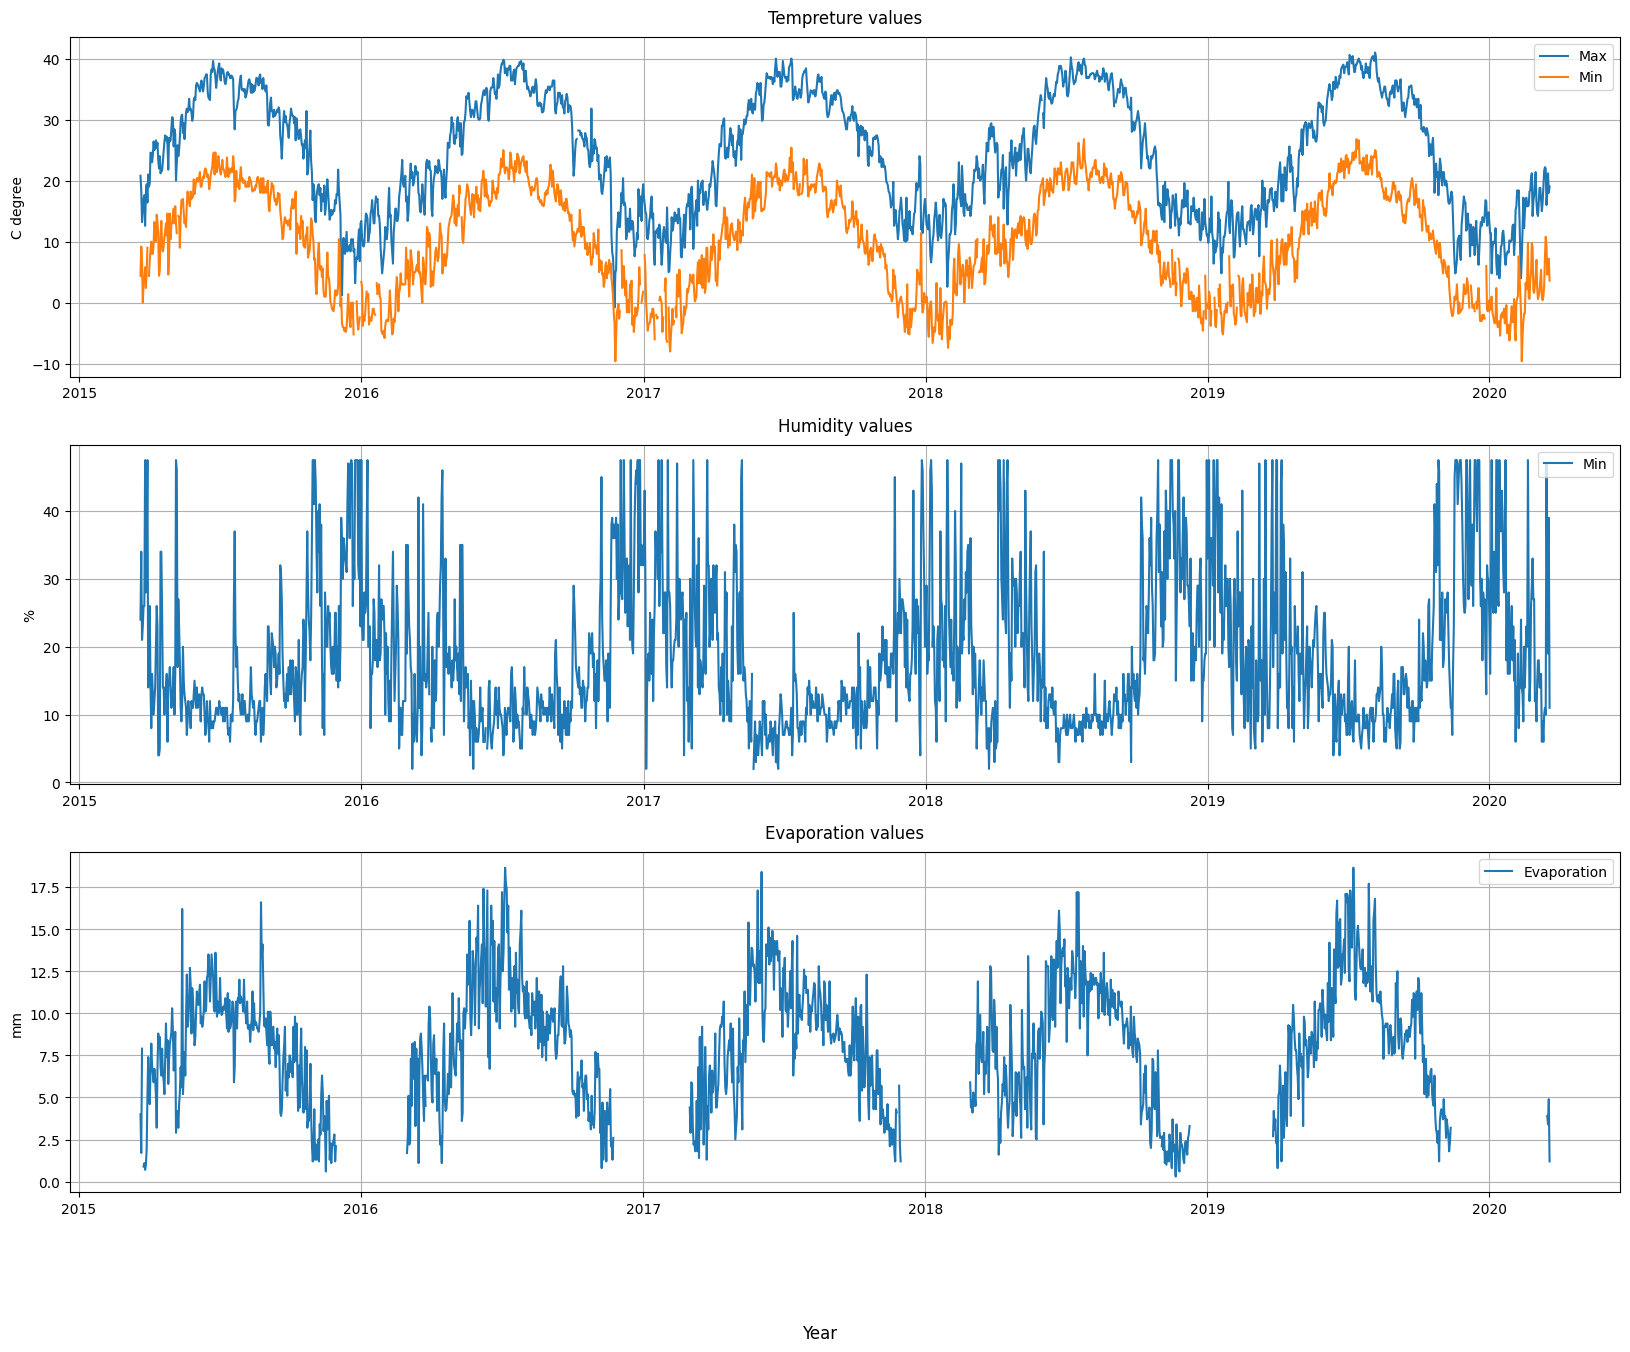

In [43]:
fig , ax = plt.subplots(3, 1, sharey='row', figsize=(20,15))
fig.supxlabel('Year')

ax[0].plot(df_2['Max temp'])
ax[0].plot(df_2['Min temp'])
ax[0].set_title("Tempreture values", pad= 10)
ax[0].set_ylabel("C degree")
ax[0].legend(['Max','Min'])
ax[0].grid()

ax[1].plot(df_2['Min releative humidity (%)'])
ax[1].set_title("Humidity values", pad= 10)
ax[1].set_ylabel("%")
ax[1].legend(['Min'], loc='upper right')
ax[1].grid()

ax[2].plot(df_2['Evap'])
ax[2].set_title("Evaporation values", pad= 10)
ax[2].set_ylabel("mm")
ax[2].legend(['Evaporation'])
ax[2].grid()


Check outliers

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width="440," align="center">

In [16]:
fig = px.box(data_frame=df_2,
       y=['Evap','Min releative humidity (%)','Min temp','Max temp'],
       template='simple_white')

fig.update_yaxes(dict(showgrid=True))
fig

NameError: name 'df_2' is not defined

` Columns ='Evap' and 'Min releative humidity (%)' have outliers`

In [23]:
df_2[['Evap','Min releative humidity (%)','Min temp','Max temp']].describe()

,Evap,Min releative humidity (%),Min temp,Max temp
count,1311.000000,1822.000000,1792.000000,1823.000000
mean,8.235393,19.189901,10.229018,24.339331
std,3.680769,12.664780,8.540894,9.731842
min,0.300000,2.000000,-9.600000,-0.800000
25%,5.400000,10.000000,2.800000,15.800000
50%,8.600000,15.000000,10.600000,24.600000
75%,10.700000,25.000000,18.000000,33.600000
max,18.800000,93.000000,26.800000,41.000000


Calculate `upper boundaries` and `lower boundaries`

In [24]:
Q1_hum = df_2['Min releative humidity (%)'].quantile(0.25)
Q3_hum = df_2['Min releative humidity (%)'].quantile(0.75)
IQR_hum = Q3_hum - Q1_hum
hum_upp = Q3_hum + (1.5 * IQR_hum)

print(f"Min releative humidity (%) upper band: {hum_upp}")

Min releative humidity (%) upper band: 47.5


In [25]:
Q1_evap = df_2['Evap'].quantile(0.25)
Q3_evap = df_2['Evap'].quantile(0.75)
IQR_evap = Q3_evap - Q1_evap
Evap_upp = Q3_evap + (1.5 * IQR_evap)

print(f"Evap upper band: {Evap_upp}")

Evap upper band: 18.65


Remove outliers

In [26]:
df_2['Evap'].clip(upper=Evap_upp , inplace=True)
df_2['Min releative humidity (%)'].clip(upper=hum_upp , inplace=True)

Check if outliers are removed

In [30]:
fig = px.box(data_frame=df_2,
             y=['Evap','Min releative humidity (%)','Min temp','Max temp'],
             points='all',
             template='simple_white',
             color_discrete_sequence=['OliveDrab'])

fig.update_yaxes(dict(showgrid=True))
fig

Visualize data after removing outliers

In [30]:
fig = px.line(data_frame=df_2,
              y=['Min releative humidity (%)'],
              template='simple_white',
              title='Humidity values %',
              color_discrete_sequence=['OliveDrab'])

fig.update_legends(dict(title=None))
fig.update_yaxes(dict(title='%'))
fig.update_xaxes(dict(title='Year'))

In [31]:
fig = px.line(data_frame=df_2,
              y=['Evap'],
              template='simple_white',
              title='Evaporation values',
              color_discrete_sequence=['OliveDrab'])

fig.update_legends(dict(title=None))
fig.update_yaxes(dict(title='mm'))
fig.update_xaxes(dict(title='Year'))

## ِDeal with NaN values

`For Evap data, we use regression to fill NaN values`

In [33]:
df_2.corr(method='pearson')[['Evap']]

,Evap
Max temp,0.810626
Min temp,0.805498
Mean temp,0.824616
Max releative humidity (%),-0.724057
Min releative humidity (%),-0.656546
Mean releative humidity (%),-0.716201
Evap,1.000000
Produced water,0.657146


Find NaN of 'Evap'

In [21]:
df_evap_nan = df_2['Evap'].loc[df_2['Evap'].isnull()]

In [22]:
df_evap_nan.index

DatetimeIndex(['2015-03-21', '2015-03-25', '2015-12-01', '2015-12-02',
               '2015-12-03', '2015-12-04', '2015-12-05', '2015-12-06',
               '2015-12-07', '2015-12-08',
               ...
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15'],
              dtype='datetime64[ns]', name='Date', length=515, freq=None)

NaN values of 'Min releative humidity (%)'

In [23]:
df_min_hum_nan = df_2['Min releative humidity (%)'].loc[df_2['Min releative humidity (%)'].isnull()]

In [24]:
df_min_hum_nan.index

DatetimeIndex(['2016-03-30', '2016-06-08', '2016-06-11', '2017-05-22'], dtype='datetime64[ns]', name='Date', freq=None)

NaN values of 'Max temp'

In [25]:
df_max_temp_nan = df_2['Max temp'].loc[df_2['Max temp'].isnull()]

In [26]:
df_max_temp_nan.index

DatetimeIndex(['2016-10-07', '2018-06-01', '2018-09-03'], dtype='datetime64[ns]', name='Date', freq=None)

NaN values of 'Min temp'

In [27]:
df_min_temp_nan = df_2['Min temp'].loc[df_2['Min temp'].isnull()]

In [28]:
df_min_temp_nan.index

DatetimeIndex(['2015-03-31', '2015-05-08', '2015-12-23', '2015-12-24',
               '2015-12-25', '2015-12-31', '2016-01-09', '2016-01-20',
               '2016-02-24', '2016-05-09', '2016-12-02', '2016-12-28',
               '2017-01-01', '2017-01-16', '2017-01-20', '2017-01-27',
               '2017-02-01', '2017-02-10', '2017-07-23', '2017-12-16',
               '2018-03-10', '2018-11-15', '2018-11-23', '2018-12-28',
               '2018-12-31', '2019-01-07', '2019-01-09', '2019-01-14',
               '2019-01-28', '2019-02-09', '2019-12-07', '2019-12-11',
               '2019-12-14', '2019-12-27'],
              dtype='datetime64[ns]', name='Date', freq=None)